# Week 2: Linearly Seperate the Area of a Triangle
**Target**: Find a line that bisector the area of a triangle, passing through a fixed point

## Table of Contents
- [0 - Packages and Tools](#0)
- [1 - Triangle Area Bisection Line Passing throught a Fixed Point](#1)
    - [1.1 - Problem Representation](#1-1)
    - [1.2 - Method](#1-2)
    - [1.3 - Result](#1-3)
    - [1.4 - Vertices Classification](#1-4)
    - [1.5 - \*Interactive Plot](#1-5)
- [2 - More General](#2)
    - [2.1 - Established Conclusion](#2-1)
    - [2.2 - Mathmatical Derivation](#2-2)
    - [2.3 - Plot](#2-3)
- [3 - Reference](#3)

<a name='0'></a>
## 0. Package and Tools

In [5]:
# Packages
import numpy as np
import random
import matplotlib.pyplot as plt

# Self-defined functions
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util import util

<a name='1'></a>
## 1. Triangle Area Bisection Line Passing throught a Fixed Point

<a name='1-1'></a>
### 1.1 Problem Representation 

Following the last week's work, here I use a point on edge on the target triangle and a random point to define the area bisection line (b-line for short).

#### 1.1.1 Conditions
The coordinates of the three vertices of a triangle are A$(x_1,x_2)$, B$(x_2,y_2)$, and C$(x_3,y_3)$. Assume that P is a point on the edge AB. R$(x_4,x_4)$ is a random point that does not collapse with P. Line $PR$ will bisetor the area of $\triangle_{ABC}$.

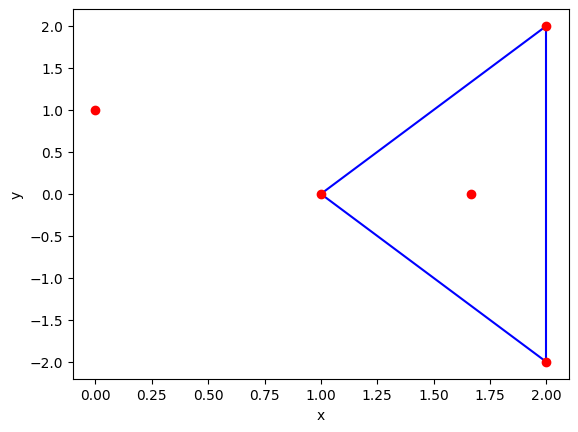

In [6]:
# Example
A = np.array([1,0])
B = np.array([2,2])
C = np.array([2,-2])
G = (A + B + C) / 3
R = np.array([0,1])
p0 = np.array([0,0])

# A = np.array([4,2])
# B = np.array([1,9])
# C = np.array([10,1])
    
util.v_triangle_2D(A,B,C)
plt.plot(A[0], A[1], 'o', color='r')
plt.plot(B[0], B[1], 'o', color='r')
plt.plot(C[0], C[1], 'o', color='r')
plt.plot(R[0], R[1], 'o', color='r')
G = util.v_triangle_barycentre(A,B,C)

<a name='1-2'></a>
### 1.2 Method

I first focus on the situation of vertex $A$.

Suppose that $P$ is on edge $AB$ and b-line $PR$ intersect $\triangle_{ABC}$ with Q on edge $AC$. Following the parameterization method last week, the coordinate of $PQ$ could be represented as

$$P = (1 - t_1)A + tB = \left((1 - t_1)x_1 + tx_2, (1 - t_1)y_1 + ty_2\right)$$ 
$$Q = (1 - t_2)A + tC = \left((1 - t_2)x_1 + tx_3, (1 - t_2)y_1 + ty_3\right)$$

Where

$$t_1, t_2 \in [0, 1]$$ 

and

$$ t_1t_2 = \frac{1}{2}$$

so

$$ \frac{1}{2t_1} = t_2 \in [0,1] $$

gives

$$
t_1, t_2 \in [\frac{1}{2}, 1] \tag {1}
$$

As points $PQR$ are collinear

$$ m_{PQ} = m_{PR} $$

gives

$$\frac{y_Q - y_P}{x_Q - x_P}=\frac{y_R - y_P}{x_R - x_P}$$

$$
\frac{((1-t_2)y_1 + t_2y_3) - ((1-t_1)y_1 + t_1y_2)}{((1-t_2)x_1 + t_2x_3) - ((1-t_1)x_1 + t_1x_2)} 
= 
\frac{y_4 - ((1-t_1)y_1 + t_1y_2)}{x_4- ((1-t_1)x_1 + t_1x_2)}\tag {2}
$$

Substitue $t_1$ with $t$ and $t_2 = \frac{1}{2t_1}$:

$$
\frac{(y_1-y_2)t^2 + \frac{1}{2}(y_3-y_1)}{(x_1-x_2)t^2 + \frac{1}{2}(x_3-x_1)} 
= 
\frac{(y_1-y_2)t + (y_4-y_1)}{(x_1-x_2)t + (x_4-x_1)} \tag {3}
$$

Expend:

$$
LHS = (x_1-x_2)(y_1-y_2)t^3 + (x_1-x_2)(y_4-y_1)t^2 + \frac{1}{2}(x_3-x_1)(y_1-y_2)t + \frac{1}{2}(x_1+x_3)(y_4-y_1)
$$

$$
RHS = (x_1-x_2)(y_1-y_2)t^3 + (x_4-x_1)(y_1-y_2)t^2 + \frac{1}{2}(x_1-x_2)(y_3-y_1)t + \frac{1}{2}(x_4+x_1)(y_1-y_3)
$$

Merge homogeneous terms:

$$
LHS = (x_1y_4+x_2y_1-x_2y_4)t^2 + \frac{1}{2}(-x_1y_2+x_3y_1-x_3y_2)t + \frac{1}{2}(x_1y_4-x_3y_1+x_3y_4)
$$

$$
RHS = (x_1y_2+x_4y_1-x_4y_2)t^2 + \frac{1}{2}(x_1y_3-x_2y_1-x_2y_3) + \frac{1}{2}(-x_1y_3+x_4y_1+x_4y_3)
$$

$$
LHS - RHS = 0
$$

Finally

$$
(x_1y_4-x_2y_4+x_2y_1-x_4y_1+x_4y_2-x_1y_2)t^2+\frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1)t+\frac{1}{2}(x_3y_4-x_3y_1-x_1y_4-x_4y_3+x_4y_1+x_1y_3)=0\tag{4}
$$

This is a quadratic function about t. Let 

<a name='equation-1'></a>
$$
f(t)=(x_1y_4-x_2y_4+x_2y_1-x_4y_1+x_4y_2-x_1y_2)t^2+\frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1)t+\frac{1}{2}(x_3y_4-x_3y_1-x_1y_4-x_4y_3+x_4y_1+x_1y_3)\tag {5}
$$

In [7]:
# Calculate f(t)
def ft(self, p1, p2, p3, p4, t):
    terms = self.compute_quadratic_coefficient(p1, p2, p3, p4)
    return terms[0] * pow(t, 2) + terms[1]*t + terms[2]

def compute_quadratic_coefficient(self, p1, p2, p3, p4):
    quadratic = (p1[0]*p4[1]-p2[0]*p4[1]+p2[0]*p1[1]-p4[0]*p1[1]+p4[0]*p2[1]-p1[0]*p2[1])
    linear = (p1[0]*p2[1]+p3[0]*p1[1]-p3[0]*p2[1]-p1[0]*p3[1]+p2[0]*p3[1]-p2[0]*p1[1])/2
    constant = (p3[0]*p4[1]-p3[0]*p1[1]-p1[0]*p4[1]-p4[0]*p3[1]+p4[0]*p1[1]+p1[0]*p3[1])/2
    return np.array([quadratic, linear, constant])

To solve the equation, let's make the it becomes $f(t)=0, t \in [\frac{1}{2}, 1]$. Since only one b-line can be found that passes through a fixed point on a triangle [\[1\]](#ref-1), which means for $f(t)$ there is excatly one solution in $[\frac{1}{2}, 1]$. This should present that 

$$f(\frac{1}{2})*f(1)<=0$$. 

Since here I only consider point $P$ on edge $AB$, there exist three situations. The conclusion can be used to preliminarily determine where the $P$ is on.

<a name='1-3'></a>
### 1.3 Result

This is the complete code of the target problem

In [8]:
class Triangle_Area_Bisection_2D_Point:
    def __init__(self, vertices, p):
        if(len(vertices) < 3):
            A = np.array([6,9])
            B = np.array([10,14])
            C = np.array([8,28])
            self.vertices = np.array([A, B, C])
        else:
            self.vertices = vertices
        self.t = []
        self.G = (vertices[0] + vertices[1] + vertices[2]) / 3
        self.p = p
        self.P = []
        self.Q = []
        # The thrid vertex of small triangle part
        self.top = []
        # The (unit) direction of the dicision boundary
        self.d = []
        
    def ft(self, p1, p2, p3, p4, t):
        terms = self.compute_quadratic_coefficient(p1, p2, p3, p4)
        return terms[0] * pow(t, 2) + terms[1]*t + terms[2]
    
    def compute_quadratic_coefficient(self, p1, p2, p3, p4):
        quadratic = (p1[0]*p4[1]-p2[0]*p4[1]+p2[0]*p1[1]-p4[0]*p1[1]+p4[0]*p2[1]-p1[0]*p2[1])
        linear = (p1[0]*p2[1]+p3[0]*p1[1]-p3[0]*p2[1]-p1[0]*p3[1]+p2[0]*p3[1]-p2[0]*p1[1])/2
        constant = (p3[0]*p4[1]-p3[0]*p1[1]-p1[0]*p4[1]-p4[0]*p3[1]+p4[0]*p1[1]+p1[0]*p3[1])/2
        return np.array([quadratic, linear, constant])
    
    def compute_quadratic_delta(self, terms):
        return pow(terms[1], 2) - 4 * terms[0] * terms[2]
    
    def compute_t(self, terms):
        delta = self.compute_quadratic_delta(terms)
#         print("delta: ", delta)
        t1 = (-terms[1]+pow(delta, 0.5)) / 2 / terms[0]
        t2 = (-terms[1]-pow(delta, 0.5)) / 2 / terms[0]
        print("t1: ", t1, "t2: ", t2)
        
        if(t1 >= 1/2 - 1e-6 and t1< 1 - 1e-6):
            return t1
        if(t2 >= 1/2 - 1e-6 and t2< 1 - 1e-6):
            return t2
        
        return -1
    
    def solve_quadratic(self, p1, p2, p3):
        terms = self.compute_quadratic_coefficient(p1, p2, p3, self.p)
        t_temp = self.compute_t(terms)
        self.t = self.t + [t_temp]
        return t_temp
    
    def get_t(self):
        if(self.ft(self.vertices[0], self.vertices[1], self.vertices[2], self.p, 0.5)*self.ft(self.vertices[0], self.vertices[1], self.vertices[2], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[0], self.vertices[1], self.vertices[2])
            P_temp = util.linear_interpolation(self.vertices[0], self.vertices[1], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[0], self.vertices[2], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("1", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[0]]
            
        if(self.ft(self.vertices[1], self.vertices[2], self.vertices[0], self.p, 0.5)*self.ft(self.vertices[1], self.vertices[2], self.vertices[0], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[1], self.vertices[2], self.vertices[0])
            P_temp = util.linear_interpolation(self.vertices[1], self.vertices[2], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[1], self.vertices[0], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("2", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[1]]
            
        if(self.ft(self.vertices[2], self.vertices[0], self.vertices[1], self.p, 0.5)*self.ft(self.vertices[2], self.vertices[0], self.vertices[1], self.p, 1) <= 1e-6):
            t_temp = self.solve_quadratic(self.vertices[2], self.vertices[0], self.vertices[1])
            P_temp = util.linear_interpolation(self.vertices[2], self.vertices[0], t_temp)
            Q_temp = util.linear_interpolation(self.vertices[2], self.vertices[1], 1/2/t_temp)
            d_temp = (P_temp - self.p) / np.linalg.norm(P_temp - self.p)
#             print("3", P_temp, " ", self.p, " ", d_temp, "t", t_temp)
            self.P = self.P + [P_temp]
            self.Q = self.Q + [Q_temp]
            self.d = self.d + [d_temp]
            self.top = self.top + [self.vertices[2]]
            
    def v_decision_boundary(self):
        for i in range(len(self.P)):
            util.v_line_2D(self.p, self.P[i])
            util.v_line_2D(self.p, self.Q[i])
            
    def v_triangle(self):
        util.v_triangle_2D(self.vertices[0], self.vertices[1], self.vertices[2])
        
    def v_vertices(self):
        plt.plot(self.vertices[0][0], self.vertices[0][1], 'o', color='r')
        plt.plot(self.vertices[1][0], self.vertices[1][1], 'o', color='r')
        plt.plot(self.vertices[2][0], self.vertices[2][1], 'o', color='r')
        
    def v_result(self):
        self.v_vertices()
        plt.plot(self.p[0], self.p[1], 'o', color='r')
        self.v_triangle()
        util.v_triangle_barycentre(self.vertices[0], self.vertices[1], self.vertices[2])
        self.get_t()
        self.v_decision_boundary()
        
    def print_info(self):
        print("The coordinates of point P: ", self.P)
        print("The coordinates of point Q: ", self.Q)
        print("The area of triangle: ", util.triangle_area_2D(self.vertices[0], self.vertices[1], self.vertices[2]))
        print("The area of small half-area triangle: ", util.triangle_area_2D(self.P[0], self.Q[0], self.top[0]))

t1:  0.9858636074491283 t2:  0.4811290575875463
The coordinates of point P:  [array([ 1.01413639, -0.02827279])]
The coordinates of point Q:  [array([2.        , 0.02867819])]
The area of triangle:  2.0
The area of small half-area triangle:  1.0


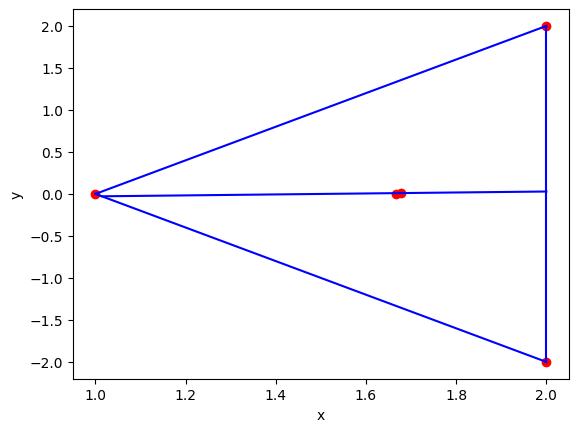

In [9]:
# R = G+np.array([5, 8])
test = Triangle_Area_Bisection_2D_Point(np.array([A,B,C]),G+np.array([0.01, 0.01]))
test.v_result()
test.print_info()

<a name='1-4'></a>
### 1.4 \*Interactive Plot

Please check out the **./triangle_bisector_interactive.py** file for more detail.

The program allow users to
+ Sepecify the 3 vertices of triangle interactively
+ Sepecify the point $R$ interactively
+ It will automatically generate the decision boundary

<a name='2'></a>
## 2. More General

In this section, we will discuss the problem in more general situation.

<a name='2-1'></a>
### 2.1 Establish Conclusion

<a name='2-2'></a>
### 2.2 Mathmatical Derivation

#### 2.2.1 Target

Obtain the general expression of the area-bisetoring deltoid

#### 2.2.2 Derivation Process

For simplicity, we replace the coefficients of [$f(t)$](#equation-1) with $a$, $b$ and $c$. Points $R$ becomes any $(x, y)$

$$
a = x_1y-x_2y+x_2y_1-xy_1+xy_2-x_1y_2 \\
= (x_1-x_2)y+(y_2-y_1)x-x_1y_2+x_2y_1\tag {6}
$$

$$
b = \frac{1}{2}(x_1y_2+x_3y_1-x_3y_2-x_1y_3+x_2y_3-x_2y_1) \tag{7}
$$

$$
c = \frac{1}{2}(x_3y-x_3y_1-x_1y-xy_3+xy_1+x_1y_3) \\
= (x_3-x_1)y+(y_1-y_3)x+x_1y_3-x_3y_1\tag{8}
$$

And thus

$$
f(t) = at^2 + bt + c \tag {9}
$$

So $f(t) = 0$ are equavilent to

$$at^2 + bt + c = 0 \tag {9}$$ Where
$$t \in [\frac{1}{2}, 1]$$

Differentiate with respect to $t$ gives

$$2at + b = 0$$

$$
t=-\frac{b}{2a}\tag {10}
$$

Back substitude

$$
\frac{b^2}{4a} - \frac{b^2}{2a} + c = 0 \\
ac - \frac{b^2}{4} = 0
$$

As the highest degree of each term of both $a$ and $c$ are 1, and $b$ is a constant. It is obvious that the result of $ac - \frac{b^2}{4}$ is **Quadratic Curve**, which can be represented in the form of $F(x,y)=Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$, where

$$
A = (y_2-y_1)(y_1-y_3)
$$

$$
C = (y_2-y_1)(x_3-x_1)+(y_1-y_3)(x_1-x_2)
$$

$$
B = (x_1-x_2)(x_3-x_1)
$$

$$
D = (y_2-y_1)(x_1y_3-x_3y_1)+(y_1-y_3)(x_1y_2+x_2y_1)
$$

$$
E = (x_1-x_2)(x_1y_3-x_3y_1)+(x_3-x_1)(x_1y_2+x_2y_1)
$$

$$
F = (x_1y_2+x_2y_1)(x_1y_3-x_3y_1)
$$

Rewrite the curve to the matrix form $F(x,y)=a_{11}x^2 + 2a_{12}xy + a_{22}y^2 + 2a_{13}x + 2a_{23}y + a_{33} = 0$

$$
A = 
\begin{pmatrix}
a_{11}&a_{12}&a_{13}\\
a_{12}&a_{22}&a_{23}\\
a_{13}&a_{23}&a_{33}\\
\end{pmatrix}
$$

Where $A$ denote a coefficient matrix. So that

$$
F(x,y)=(x,y,1)^TA(x,y,1)=X^TAX=0
$$

And

$$
a_{11} = (y_2-y_1)(y_1-y_3)
$$

$$
a_{12} = \frac{(y_2-y_1)(x_3-x_1)+(y_1-y_3)(x_1-x_2)}{2}
$$

$$
a_{21} = (x_1-x_2)(x_3-x_1)
$$

$$
a_{13} = \frac{(y_2-y_1)(x_1y_3-x_3y_1)+(y_1-y_3)(x_1y_2+x_2y_1)}{2}
$$

$$
a_{23} = \frac{(x_1-x_2)(x_1y_3-x_3y_1)+(x_3-x_1)(x_1y_2+x_2y_1)}{2}
$$

$$
a_{33} = (x_1y_2+x_2y_1)(x_1y_3-x_3y_1)
$$

$$
I_2=det
\begin{pmatrix}
a_{11}&a_{12}\\
a_{12}&a_{22}\\
\end{pmatrix}
$$

$$
I_3=det(A)
$$

<a name='2-3'></a>
### 2.3 Plot

Here is the general code to plot the hyperbolas.

In [ ]:
class Triangle_Area_Bisection_2D:
    def __init__(self, vertices):
        if(len(vertices) < 3):
            A = np.array([6,9])
            B = np.array([10,14])
            C = np.array([8,28])
            self.vertices = np.array([A, B, C])
        else:
            self.vertices = vertices
        self.G = (vertices[0] + vertices[1] + vertices[2]) / 3
        self.coef = []
        
    def compute_coefficients_single(self, a, b, c):
        A = (B[1]-A[1])*(A[1]-C[1])
        B = (B[1]-A[1])*(C[0]-A[0])+(A[0]-A[0])*(A[1]-C[1])
        C = (A[0]-A[0])*(C[0]-A[0])
        D = (B[1]-A[1])*(A[0]*C[1]-C[0]*A[1])+(A[1]-C[1])*(A[0]*B[1]+B[0]*A[1])
        E = (A[0]-A[0])*(A[0]*C[1]-C[0]*A[1])+(C[0]-A[0])*(A[0]*B[1]+B[0]*A[1])
        F = (A[0]*C[1]-C[0]*A[1])*(A[0]*B[1]+B[0]*A[1])
        self.coef = [A,B,C,D,E,F]
        
class 

<a name='3'></a>
## 5. Reference

<a name='ref-1'></a>
1. [Craizer, Marcos. "Envelopes of Bisection Lines of Polygons." arXiv preprint arXiv:2203.10559 (2022).](https://arxiv.org/abs/2203.10559)